<a href="https://colab.research.google.com/github/Anna72/lab-lkfs/blob/main/rez_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
# n - number of objects in production line
# для каждого обьекта хранятся данные показаттелей его сенсоров
# для простого примера - данные для одного обьекта в виде массива с значениями от 0 до 1 где 1 - последнее число в массиве, при таком условии 
# данный обьект не работает, необходимо т.о.


n = 10 #number of objects in line 
data_len = np.random.random_integers(199,200, n)
print(data_len)

x = []
for i in range(n):
  z = np.random.random(data_len[i])
  z.sort()
  z[data_len[i] - 1] = 1
  x.append(z)
print(x)

# x , data shows level of usage


[199 200 199 200 200 200 199 199 199 199]
[array([0.00652858, 0.013579  , 0.01523294, 0.01991816, 0.02624914,
       0.02763903, 0.03545008, 0.03923762, 0.04032969, 0.05755176,
       0.05784336, 0.06168289, 0.0627303 , 0.07065875, 0.07226225,
       0.07416432, 0.07487814, 0.08137128, 0.08308876, 0.08595273,
       0.08902079, 0.08912285, 0.09207588, 0.09393331, 0.09753846,
       0.09855874, 0.10430979, 0.10674628, 0.10713583, 0.1105542 ,
       0.11442599, 0.11446599, 0.11819929, 0.12097406, 0.12283014,
       0.12745099, 0.13249208, 0.13268774, 0.13540573, 0.14162686,
       0.14793087, 0.15055897, 0.15321176, 0.15372993, 0.15467151,
       0.15808619, 0.16670717, 0.1674637 , 0.17212938, 0.17229315,
       0.17596167, 0.18397581, 0.18506006, 0.19632421, 0.19864791,
       0.20327562, 0.20386503, 0.21998672, 0.23697428, 0.24049408,
       0.24056396, 0.24668629, 0.24928621, 0.25682529, 0.25686581,
       0.26239922, 0.26250164, 0.2654512 , 0.27111187, 0.2737117 ,
       0.28147774, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: This function is deprecated. Please call randint(199, 200 + 1) instead
  # This is added back by InteractiveShellApp.init_path()


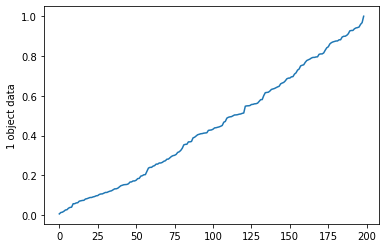

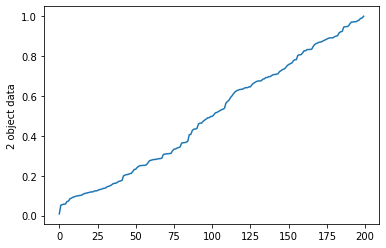

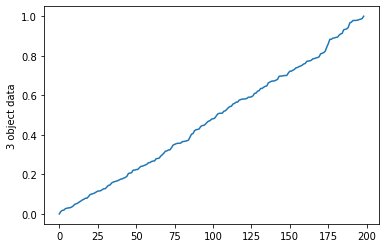

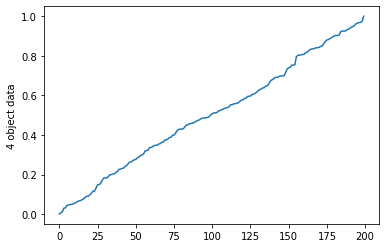

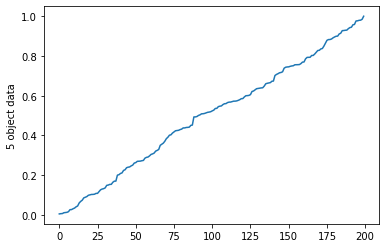

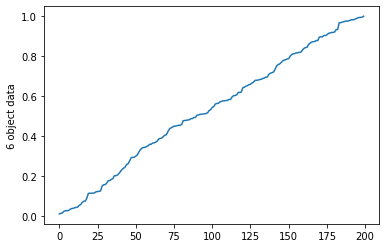

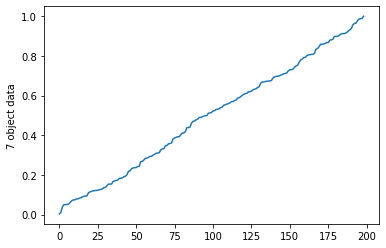

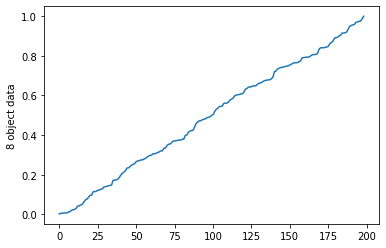

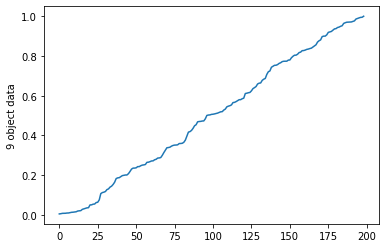

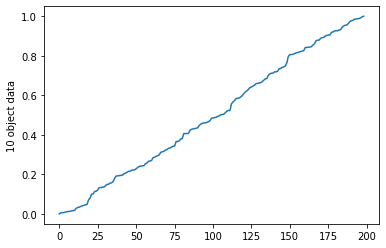

In [ ]:
import matplotlib.pyplot as plt
for i in range(n):
  plt.plot(x[i])
  plt.ylabel(str(i+1) + ' object data')
  plt.show()

In [ ]:
# y - vector for genetic algorithm
# exmpl y = [0.8,0.8,0.8,0.8,0.8]

#result function
# old version 
def upd_data(i):
  data_len_new = np.random.random_integers(399,400,1)
  z = np.random.random(data_len_new)
  z.sort()
  z[data_len_new - 1] = 1
  x[i] = z


def rez_func(y):
  rez = 0 # counter for useful working time of each obj
  rezminus = 0 # counter for maintenance cost for each obj
  counter = [0]*n # step in time table showing 
  isworking = [1]*n # isworking[i] = 1 means object is working , isworking[i] = 0 means obj is stopped for reapair or waiting 

  for i in range(10000):
    for j in range(n):
      if isworking[j] == 0:
        counter[j] += 1
        rezminus += 1
        if counter[j] == 20: # 20 ??? iterations stop for maintenance
          # object supposed to start working again
          upd_data(j)
          isworking[j] = 1
          counter[j] = 0
      else:
        if x[j][counter[j]] < 0.8: 
          counter[j] +=1
          rez += 1
        if x[j][counter[j]] >= 0.8: 
          isworking[j] = 0
          counter[j] = 0
          # object j is stopped now we need to check all next 

          for k in range(j+1, n-1,1):
            if x[k][counter[k]] >= y[k]:
              isworking[k] = 0
              counter[k] = 0


  print('test with y values = ', y[0])          
  print(rez, ' working time ')
  print(rezminus, 'maintenance cost')
  print(' ')


for i in range(1,10,1):
  y = [i/10] * n
  rez_func(y)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: This function is deprecated. Please call randint(399, 400 + 1) instead
  import sys


test with y values =  0.1
93360  working time 
6640 maintenance cost
 
test with y values =  0.2
93600  working time 
6400 maintenance cost
 
test with y values =  0.3
94180  working time 
5820 maintenance cost
 
test with y values =  0.4
93900  working time 
6100 maintenance cost
 
test with y values =  0.5
94187  working time 
5813 maintenance cost
 
test with y values =  0.6
94200  working time 
5800 maintenance cost
 
test with y values =  0.7
94200  working time 
5800 maintenance cost
 
test with y values =  0.8
94200  working time 
5800 maintenance cost
 
test with y values =  0.9
94200  working time 
5800 maintenance cost
 


In [ ]:
#version 10.02

def upd_data(i):
  data_len_new = np.random.random_integers(199,200,1)
  z = np.random.random(data_len_new)
  z.sort()
  z[data_len_new - 1] = 1
  x[i] = z



global_work = 0

def rez_func(y):
  # exmpl y = [0.8,0.8,0.8,0.8,0.8]
  for i in range(len(y)):
    y[i] /= 10
  test_time = 1000
  maint_coef = 40
  maint_time = 40
  rez = 0 # counter for useful working time of each obj
  rezminus = 0 # counter for maintenance cost for each obj
  counter = [0] * n # step in time table showing 
  isworking = [1] * n  # isworking[i] = 1 means object is working , isworking[i] = 0 means obj is stopped for reapair ,2 - waiting 
  stop_point = [0] * n  
  how_line_works = 0
  how_line_works = [[] for _ in range(n)]
  #print(how_line_works, ' first step')
  r = 0

  for i in range(test_time):

    for j in range(n):
      how_line_works[j].append(isworking[j])
      #print(how_line_works)
      if isworking[j] == 0 or isworking[j] == 2 :
        counter[j] += 1 
        #rezminus += 1
        if counter[j] == maint_time: # 20 ??? iterations stop for maintenance
          if isworking[j] == 0:
            upd_data(j) # object supposed to start working again, so we will use new data
            counter[j] = 0
          else:   
            counter[j] = stop_point[j] 
          isworking[j] = 1
      else:
        if x[j][counter[j]] < 0.8: 
          counter[j] +=1
          rez += 1
        if x[j][counter[j]] >= 0.8: 
          rezminus += x[j][counter[j]] * maint_coef # basic cost for maintenance = maint_coef * percent of usage 
          isworking[j] = 0
          counter[j] = 0
          # object j is stopped now we need to check all next 
          for k in range(j+1, n-1,1):
            if x[k][counter[k]] >= y[k]: # checking the vector conditions
              rezminus += x[k][counter[k]] * maint_coef # cost of maintenance should be proportionate to time the object is used
              isworking[k] = 0
              counter[k] = 0
            else:
              r +=1
              stop_point[k] = counter[k]
              isworking[k] = 2 
              counter[k] = 0

  #print(r)
  #for j in range(n):
  #  plt.plot(how_line_works[j], 'ro')
    # plt.ylabel(str(j+1) + ' object data')
    # plt.show()
  #print('test with y values = ', y)          
  # print(rez, ' working time ')
  # print(rezminus, 'maintenance cost')
  # print(rez - rezminus,"global rez")
  return(-rez + rezminus)
  # print(' ')



    


In [ ]:
#result function testing
for i in range(1,10,1):
  y = [i] * n
  
  print(rez_func(y))
  

-5597.191182121321
-5420.89470404498
-5985.2337633115585
-5669.3350500679135
-5558.950277333972
-6028.165028879838
-5663.53578878617
-5603.744615299689
-5855.882580915202


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(199, 200 + 1) instead
  after removing the cwd from sys.path.


In [ ]:
#result function testing
# global_work = 0
# i = 5
# y = [i/10] * n
# rez_func(y,20,10000) 





     |████████████████████████████████| 51kB 4.6MB/s 
  Created wheel for func-timeout: filename=func_timeout-4.3.5-cp37-none-any.whl size=15079 sha256=ab263861d9d269d6d47874b94a701cdce5fdfc713d568840d19221e973074635
  Stored in directory: /root/.cache/pip/wheels/46/7c/4f/24f1d2d5bbff92219debe7ea19af84f76ddeb90dd4ec544f26
Successfully built func-timeout
 The best solution found:
 [0.00029053 0.00059897 0.00166983]

 Objective function:
 0.002559324763941051


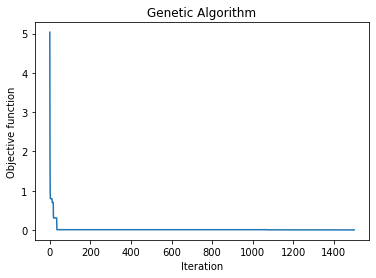

In [ ]:
#example how ga works
!pip install geneticalgorithm
from geneticalgorithm import geneticalgorithm as ga

def f(X):
    return np.sum(X)
varbound=np.array([[0,10]]*3)

model=ga(function=f,dimension=3,variable_type='real',variable_boundaries=varbound)
model.run()

In [ ]:
varbound=np.array([[1,10]]*5)
varbound

array([[ 1, 10],
       [ 1, 10],
       [ 1, 10],
       [ 1, 10],
       [ 1, 10]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(200, 400 + 1) instead
  after removing the cwd from sys.path.


 The best solution found:
 [ 6.  4. 10.  9. 10.]

 Objective function:
 -3477.1361158576115


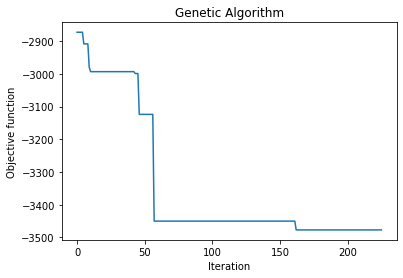

In [ ]:

model= ga(function = rez_func, dimension=5, variable_type='int',variable_boundaries=varbound)
#1000 
# test_time = 10000
# maint_coef = 100
# maint_time = 100
# 100/100
model.run()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(399, 400 + 1) instead
  after removing the cwd from sys.path.


 The best solution found:
 [ 7.  6.  8. 10. 10.  9.  9.  8.  8.  1.]

 Objective function:
 -7489.025193035624


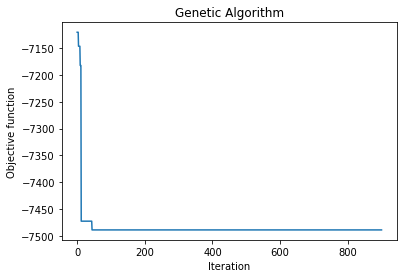

In [ ]:
!pip install geneticalgorithm
from geneticalgorithm import geneticalgorithm as ga
varbound=np.array([[1,10]]*n)

model= ga(function = rez_func, dimension=10, variable_type='int',variable_boundaries=varbound)
#test_time = 1000
#usefil working time ~ 399-400
#maint_coef = 100
#maint_time = 100
#
model.run()

In [ ]:
y = [7,  6,  8, 10, 10 , 9, 9,  8,  8,  1]
print(rez_func(y))
  

-62213.33967561677


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(199, 200 + 1) instead
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(199, 200 + 1) instead
  after removing the cwd from sys.path.


 The best solution found:
 [ 8.  4.  9.  8.  8. 10. 10.  9.  9.  3.]

 Objective function:
 -7269.739186730485


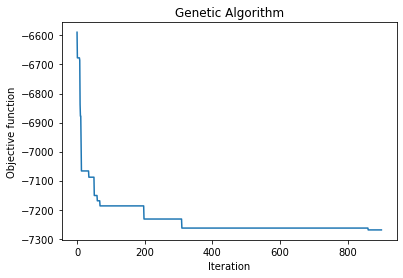

In [ ]:
model= ga(function = rez_func, dimension=10, variable_type='int',variable_boundaries=varbound)
#test_time = 1000
#usefil working time ~ 199-200
#maint_coef = 40
#maint_time = 40
#n. = 10
model.run()
# [0.8]*10 approach
# 200 * 0.8  = 160 wt 
# 40 * 0.8  = 32maint cost 
# 160 -32 = 128 one cycle benefit
# 160 + 40 = 200 one cycle time
# 640 = 10000/ 420* 260
# 6400 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(200, 400 + 1) instead
  after removing the cwd from sys.path.


 The best solution found:
 [ 3.  2. 10.  9.  8.]

 Objective function:
 -23472.446901063246


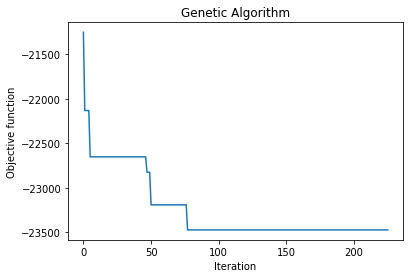

In [ ]:
model= ga(function = rez_func, dimension=5, variable_type='int',variable_boundaries=varbound)
#usefil working time ~ 200-400
#test_time = 10000
#maint_coef = 100
#maint_time = 100
model.run()

In [ ]:
model= ga(function = rez_func, dimension=5, variable_type='int',variable_boundaries=varbound)
#usefil working time ~ 399-400
#test_time = 10000
#maint_coef = 100
#maint_time = 100
model.run()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(390, 400 + 1) instead
  after removing the cwd from sys.path.


 The best solution found:
 [ 7.  9.  8. 10.  2.]

 Objective function:
 -31318.35268984858


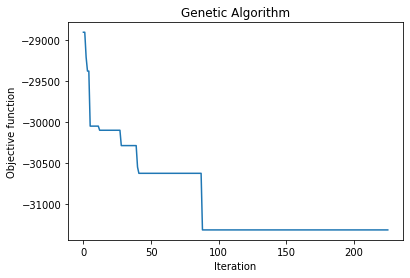

In [ ]:
# xy =  [3, 2, 10, 9, 8]

# print(rez_func(xy))
model= ga(function = rez_func, dimension=5, variable_type='int',variable_boundaries=varbound)
#usefil working time ~ 390-400
#test_time = 10000
#maint_coef = 100
#maint_time = 100
model.run()
# [0.8]*5 approach
# 400 * 0.8  = 320 wt 
# 100 * 80  = maint cost 
# 320 - 80 = 260 one cycle benefit
# 320 + 100 = 420 one cycle time
# 6190 = 10000/ 420* 260
# 6190 *30952 

In [ ]:
xy =  [7, 9, 8, 10, 2]
print(rez_func(xy))

NameError: ignored